<b>Aktywność 6</b><br>
Niezbędne biblioteki: geopandas, pandas, pyproj

<b>Ćwiczenie 1.</b> Wczytaj dane z pliku ``shopping_centres.txt`` do obiektu typu DataFrame o nazwie <i>shopping_centres</i>.

In [1]:
import pandas as pd

### your code ###

shopping_centres = pd.read_csv("shopping_centres.txt", sep=";")

In [2]:
shopping_centres.head()

,id,name,addr
0,0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland"
2,2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland"
3,3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland"


Zweryfikuj poprawność kodu.

In [3]:
assert isinstance(shopping_centres, pd.DataFrame)
for column in ('id', 'name', 'addr'):
    assert column in shopping_centres.columns

<b>Ćwiczenie 2.</b> Przeprowadź geokodowanie adresów z wykorzystaniem zmiennej <i>geocoded_addresses</i> i geokodera Nominatim.

In [4]:
from geopandas.tools import geocode

### your code ###
geocoded_addresses = geocode(shopping_centres["addr"], provider="nominatim", user_agent="Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36", timeout=20)

In [5]:
geocoded_addresses.address.iloc[0]

'Specsavers Optikko, 1-7, Itäkatu, Itäkeskus, Vartiokylä, Itäinen suurpiiri, Helsinki, Helsingin seutukunta, Uusimaa, Manner-Suomi, 00930, Suomi / Finland'

<b>Ćwiczenie 3.</b> Złącz wynik geokodowania z danymi wejściowymi i zapisz je w obiekcie typu GeoDataFrame o nazwie <i>shopping_centres</i>.

In [6]:
import geopandas as gpd

### your code ###

shopping_centres = pd.concat([shopping_centres, geocoded_addresses.geometry], axis=1)

In [7]:
shopping_centres

,id,name,addr,geometry
0,0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland",POINT (25.0806 60.21041)
1,1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland",POINT (24.93781 60.16903)
2,2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (24.73805 60.16146)
3,3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (24.80836 60.21818)
4,4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (24.96568 60.29159)
5,5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (24.97924 60.18735)
6,6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland",POINT (24.9303 60.19838)


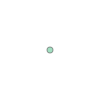

In [8]:
shopping_centres.geometry.iloc[0]

In [9]:
shopping_centres = gpd.GeoDataFrame(shopping_centres, geometry=shopping_centres.geometry, crs="EPSG:4326")

Zweryfikuj poprawność kodu.

In [10]:
assert isinstance(shopping_centres, gpd.GeoDataFrame)
for column in ('id', 'name', 'addr', 'geometry'):
    assert column in shopping_centres.columns

<b>Ćwiczenie 4.</b> Przeprowadź projekcję danych na EPSG:3879.

In [11]:
### your code ###

shopping_centres = shopping_centres.to_crs("EPSG:3879")

Zweryfikuj poprawność kodu.

In [12]:
import pyproj

assert shopping_centres.crs == pyproj.CRS('EPSG:3879')

<b>Ćwiczenie 5.</b> Zapisz plik w formacie ShapeFile pod nazwą ``shopping_centres.shp``.

In [13]:
### your code ###

shopping_centres.to_file("shopping_centres.shp")

<b>Ćwiczenie 6.</b> Oblicz bufor o promieniu 1.5 km od każdego centrum handlowego. Nadpisz wynik w kolumnie <i>geometry</i>.

In [14]:
### your code ###

shopping_centres["geometry"] = shopping_centres.buffer(1500)

Zweryfikuj poprawność kodu.

In [15]:
assert shopping_centres.geometry.geom_type.unique() == ['Polygon']

<b>Ćwiczenie 7.</b> Pobierz dane dotyczące populacji z wykorzystaniem zmiennej <i>population_grid</i>.

In [16]:
population_grid = gpd.read_file(
    (
        'https://kartta.hsy.fi/geoserver/wfs'
        '?service=wfs'
        '&version=2.0.0'
        '&request=GetFeature'
        '&typeName=asuminen_ja_maankaytto:Vaestotietoruudukko_2020'
        '&srsName=EPSG:3879'
    ),
)

population_grid.crs = 'EPSG:3879'

Zweryfikuj poprawność kodu.

In [17]:
assert isinstance(population_grid, gpd.GeoDataFrame)
assert population_grid.crs == pyproj.CRS('EPSG:3879')

<b>Ćwiczenie 8.</b> Wykonaj odpowiednie złączenie przestrzenne pomiędzy obiektami <i>shopping_centres</i> i <i>population_grid</i> z wykorzystaniem zmiennej <i>populations</i>. Następnie usuń wszystkie kolumny poza <i>name</i> i <i>asukkaita</i> (<i>population</i>).

In [20]:
### your code ###
populations = gpd.sjoin(shopping_centres, population_grid)[["name","asukkaita"]]
populations

,name,asukkaita
0,Itis,63
0,Itis,43
0,Itis,80
0,Itis,319
0,Itis,202
...,...,...
6,Tripla,6
6,Tripla,368
6,Tripla,104
6,Tripla,35


<b>Ćwiczenie 9.</b> Dla każdego centrum handlowego oblicz liczbę mieszkańców żyjących w promieniu 1.5 km od niego. Rezultat nadpisz w zmiennej <i>populations</i>.

In [21]:
### your code ###
populations.groupby("name").sum().reset_index()

,name,asukkaita
0,Forum,79188
1,Iso-omena,35139
2,Itis,30470
3,Jumbo,11532
4,REDI,42857
5,Sello,32226
6,Tripla,44164
